<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

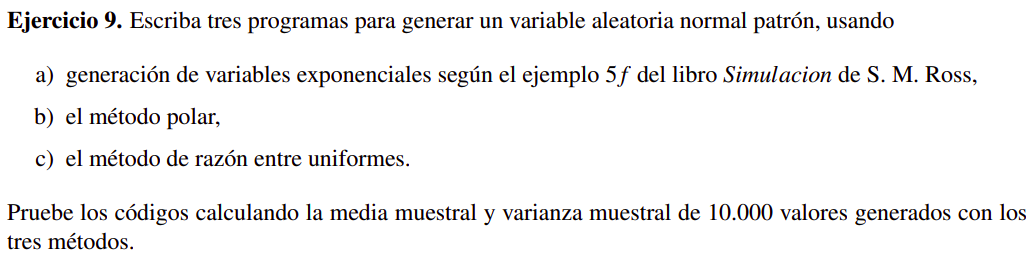

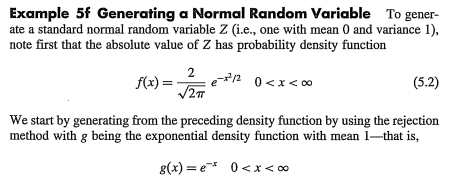

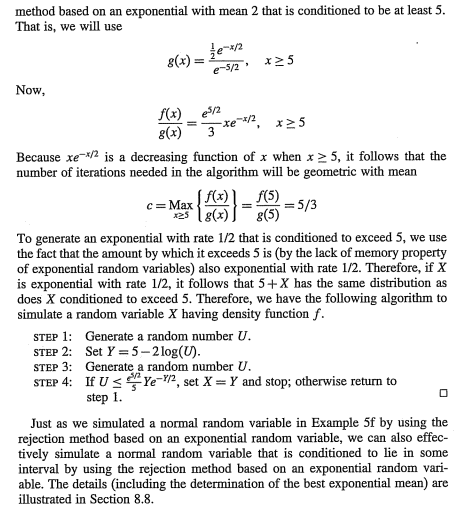

https://eprints.uad.ac.id/13/1/Sheldon_M._Ross_-_Simulation.pdf

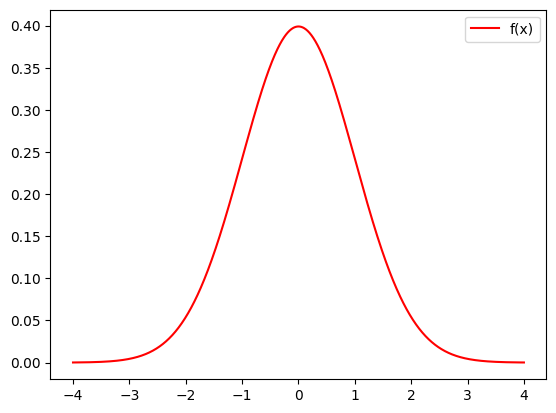

In [9]:
import numpy as np
from random import random
import seaborn as sns
import matplotlib.pyplot as plt

#@title { vertical-output: true}

MU=0
SIGMA=1

def f_Z(x, mu=MU, sigma=SIGMA):
  return np.e**(- (x- mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

DOMINIO = np.linspace(MU - 4*SIGMA, MU + 4*SIGMA, 1000) # reales
NUMERO_DE_MUESTRAS = 100_000

sns.lineplot(x=DOMINIO, y=f_Z(DOMINIO), label='f(x)', color='red')
plt.legend()
plt.show()

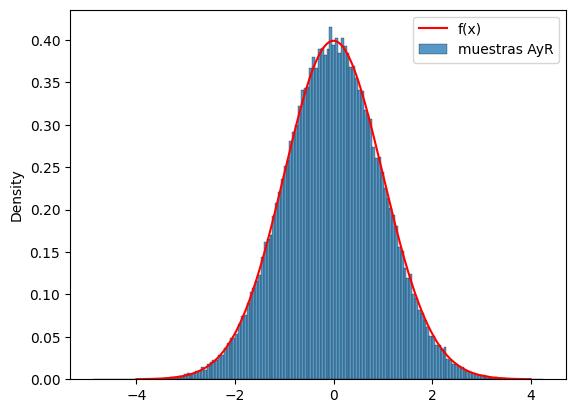

In [10]:
#@title { vertical-output: true}
## Como hicimos en clase, en el primer ejercicio:
# a) generación de variables exponenciales según el ejemplo 5f del libro Simulacion de S. M. Ross

def normal_AyR(mu=MU, sigma=SIGMA):
  while True:
    muestra = -np.log(1 - random()) # ~E(1)
    u = -np.log(1 - random())     # Queda ~E(1) al poner ln a ambos lados de la desigualdad
    if u >= (muestra - 1)**2 / 2: # se da vuelta la desigualdad ademas
      n = muestra * sigma
      return  mu + n if random() < 0.5 else mu - n

muestras = [normal_AyR() for _ in range(NUMERO_DE_MUESTRAS)]

sns.lineplot(x=DOMINIO, y=f_Z(DOMINIO), label='f(x)', color='red')
sns.histplot(muestras, stat='density', label='muestras AyR')
plt.legend()
plt.show()

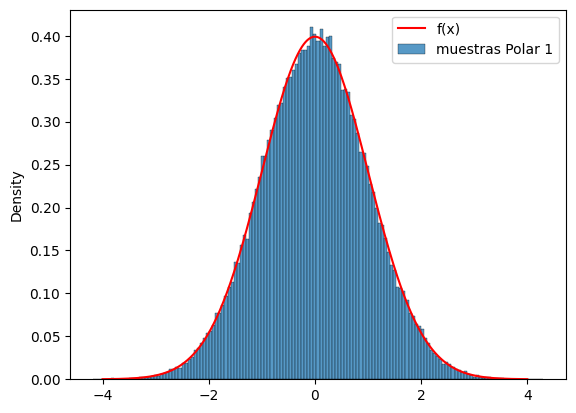

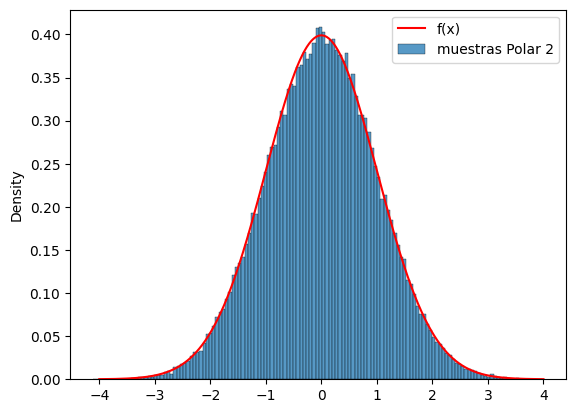

In [11]:
#@title { vertical-output: true}
# b) el método polar

# no me gaste en entender el teorico (arqtg, trigonometria, jacobiano,...)

def normal_Polar(mu=MU, sigma=SIGMA):
  r_cuadrado = -2 * np.log(1 - random())
  theta = 2 * np.pi * random()
  n1 = np.sqrt(r_cuadrado) * np.cos(theta) * sigma + mu
  n2 = np.sqrt(r_cuadrado) * np.sin(theta) * sigma + mu
  return n1, n2

muestras_1 = [normal_Polar()[0] for _ in range(NUMERO_DE_MUESTRAS)]
muestras_2 = [normal_Polar()[1] for _ in range(NUMERO_DE_MUESTRAS)]

sns.lineplot(x=DOMINIO, y=f_Z(DOMINIO), label='f(x)', color='red')
sns.histplot(muestras_1, stat='density', label='muestras Polar 1')
plt.legend()
plt.show()

sns.lineplot(x=DOMINIO, y=f_Z(DOMINIO), label='f(x)', color='red')
sns.histplot(muestras_2, stat='density', label='muestras Polar 2')
plt.legend()
plt.show()

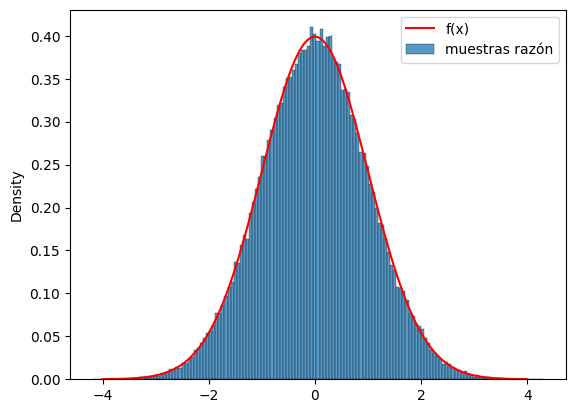

In [12]:
#@title { vertical-output: true}
# c) el método de razón entre uniformes

NV_MAGICCONST = 4 * np.exp(-0.5) / np.sqrt(2.0)
def normalvariate(mu=MU, sigma=SIGMA):
  while True:
    u1 = random()
    u2 = 1.0 - random()
    z = NV_MAGICCONST * (u1 - 0.5) / u2
    zz = z * z / 4.0
    if zz <= -np.log(u2):
      break
    return mu + z * sigma

muestras = [normalvariate() for _ in range(NUMERO_DE_MUESTRAS)]

sns.lineplot(x=DOMINIO, y=f_Z(DOMINIO), label='f(x)', color='red')
sns.histplot(muestras_1, stat='density', label='muestras razón')
plt.legend()
plt.show()